---
### 飞行管理问题
> 1995年国赛A题

可以将飞机 $i$ 视为不动而飞机 $j$ 以相对速度 $\boldsymbol v$ 相对于飞机 $i$ 运动
$$
\begin{align*}
{\boldsymbol v} &={\boldsymbol v}_j - {\boldsymbol v}_i\\
&=\left(a\cos\theta_j-a\cos\theta_i, a\sin\theta_j-a\sin\theta_i\right)\\
&=2a\sin\frac{\theta_j - \theta_i}{2}\left(\cos\left( \frac\pi2+\frac{\theta_j - \theta_i}{2} \right),\sin\left( \frac\pi2+\frac{\theta_j - \theta_i}{2} \right) \right)
\end{align*}
$$
则相对飞行方向角为 $\beta_{ij}=\dfrac\pi2+\dfrac{\theta_j - \theta_i}{2}$

记 $\alpha_{ij}^0 = \arcsin \dfrac {8}{r_{ij}^0}$，$\beta_{ij}^0$ 为调整前第 $j$ 架飞机相对第 $i$ 架飞机的相对速度与这两架飞机的连线 (从 $j$ 指向 $i$ ) 的夹角，那么两架飞机不相撞 (对称地) 的条件为
$$
\left| \beta_{ij}^0 + \dfrac 1 2 \left(\Delta\theta_i + \Delta\theta_j\right)\right|>\alpha_{ij}^0
$$
其中 $\beta_{mn}^0=\arg{\boldsymbol v}_{mn} - \arg \overrightarrow{NM} = \arg \dfrac{\boldsymbol v_{mn}}{\overrightarrow{NM}}$ 
> 复数辐角的差等于商的辐角

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
pos = np.array([
    [150, 140, 243],
    [85, 85, 236],
    [150, 155, 220.5],
    [145, 50, 159],
    [130, 150, 230],
    [0, 0, 52],
])
pos[:, 2] = pos[:, 2]/180*np.pi # 化为弧度制
pos

array([[150.        , 140.        ,   4.24115008],
       [ 85.        ,  85.        ,   4.11897703],
       [150.        , 155.        ,   3.848451  ],
       [145.        ,  50.        ,   2.77507351],
       [130.        , 150.        ,   4.01425728],
       [  0.        ,   0.        ,   0.90757121]])

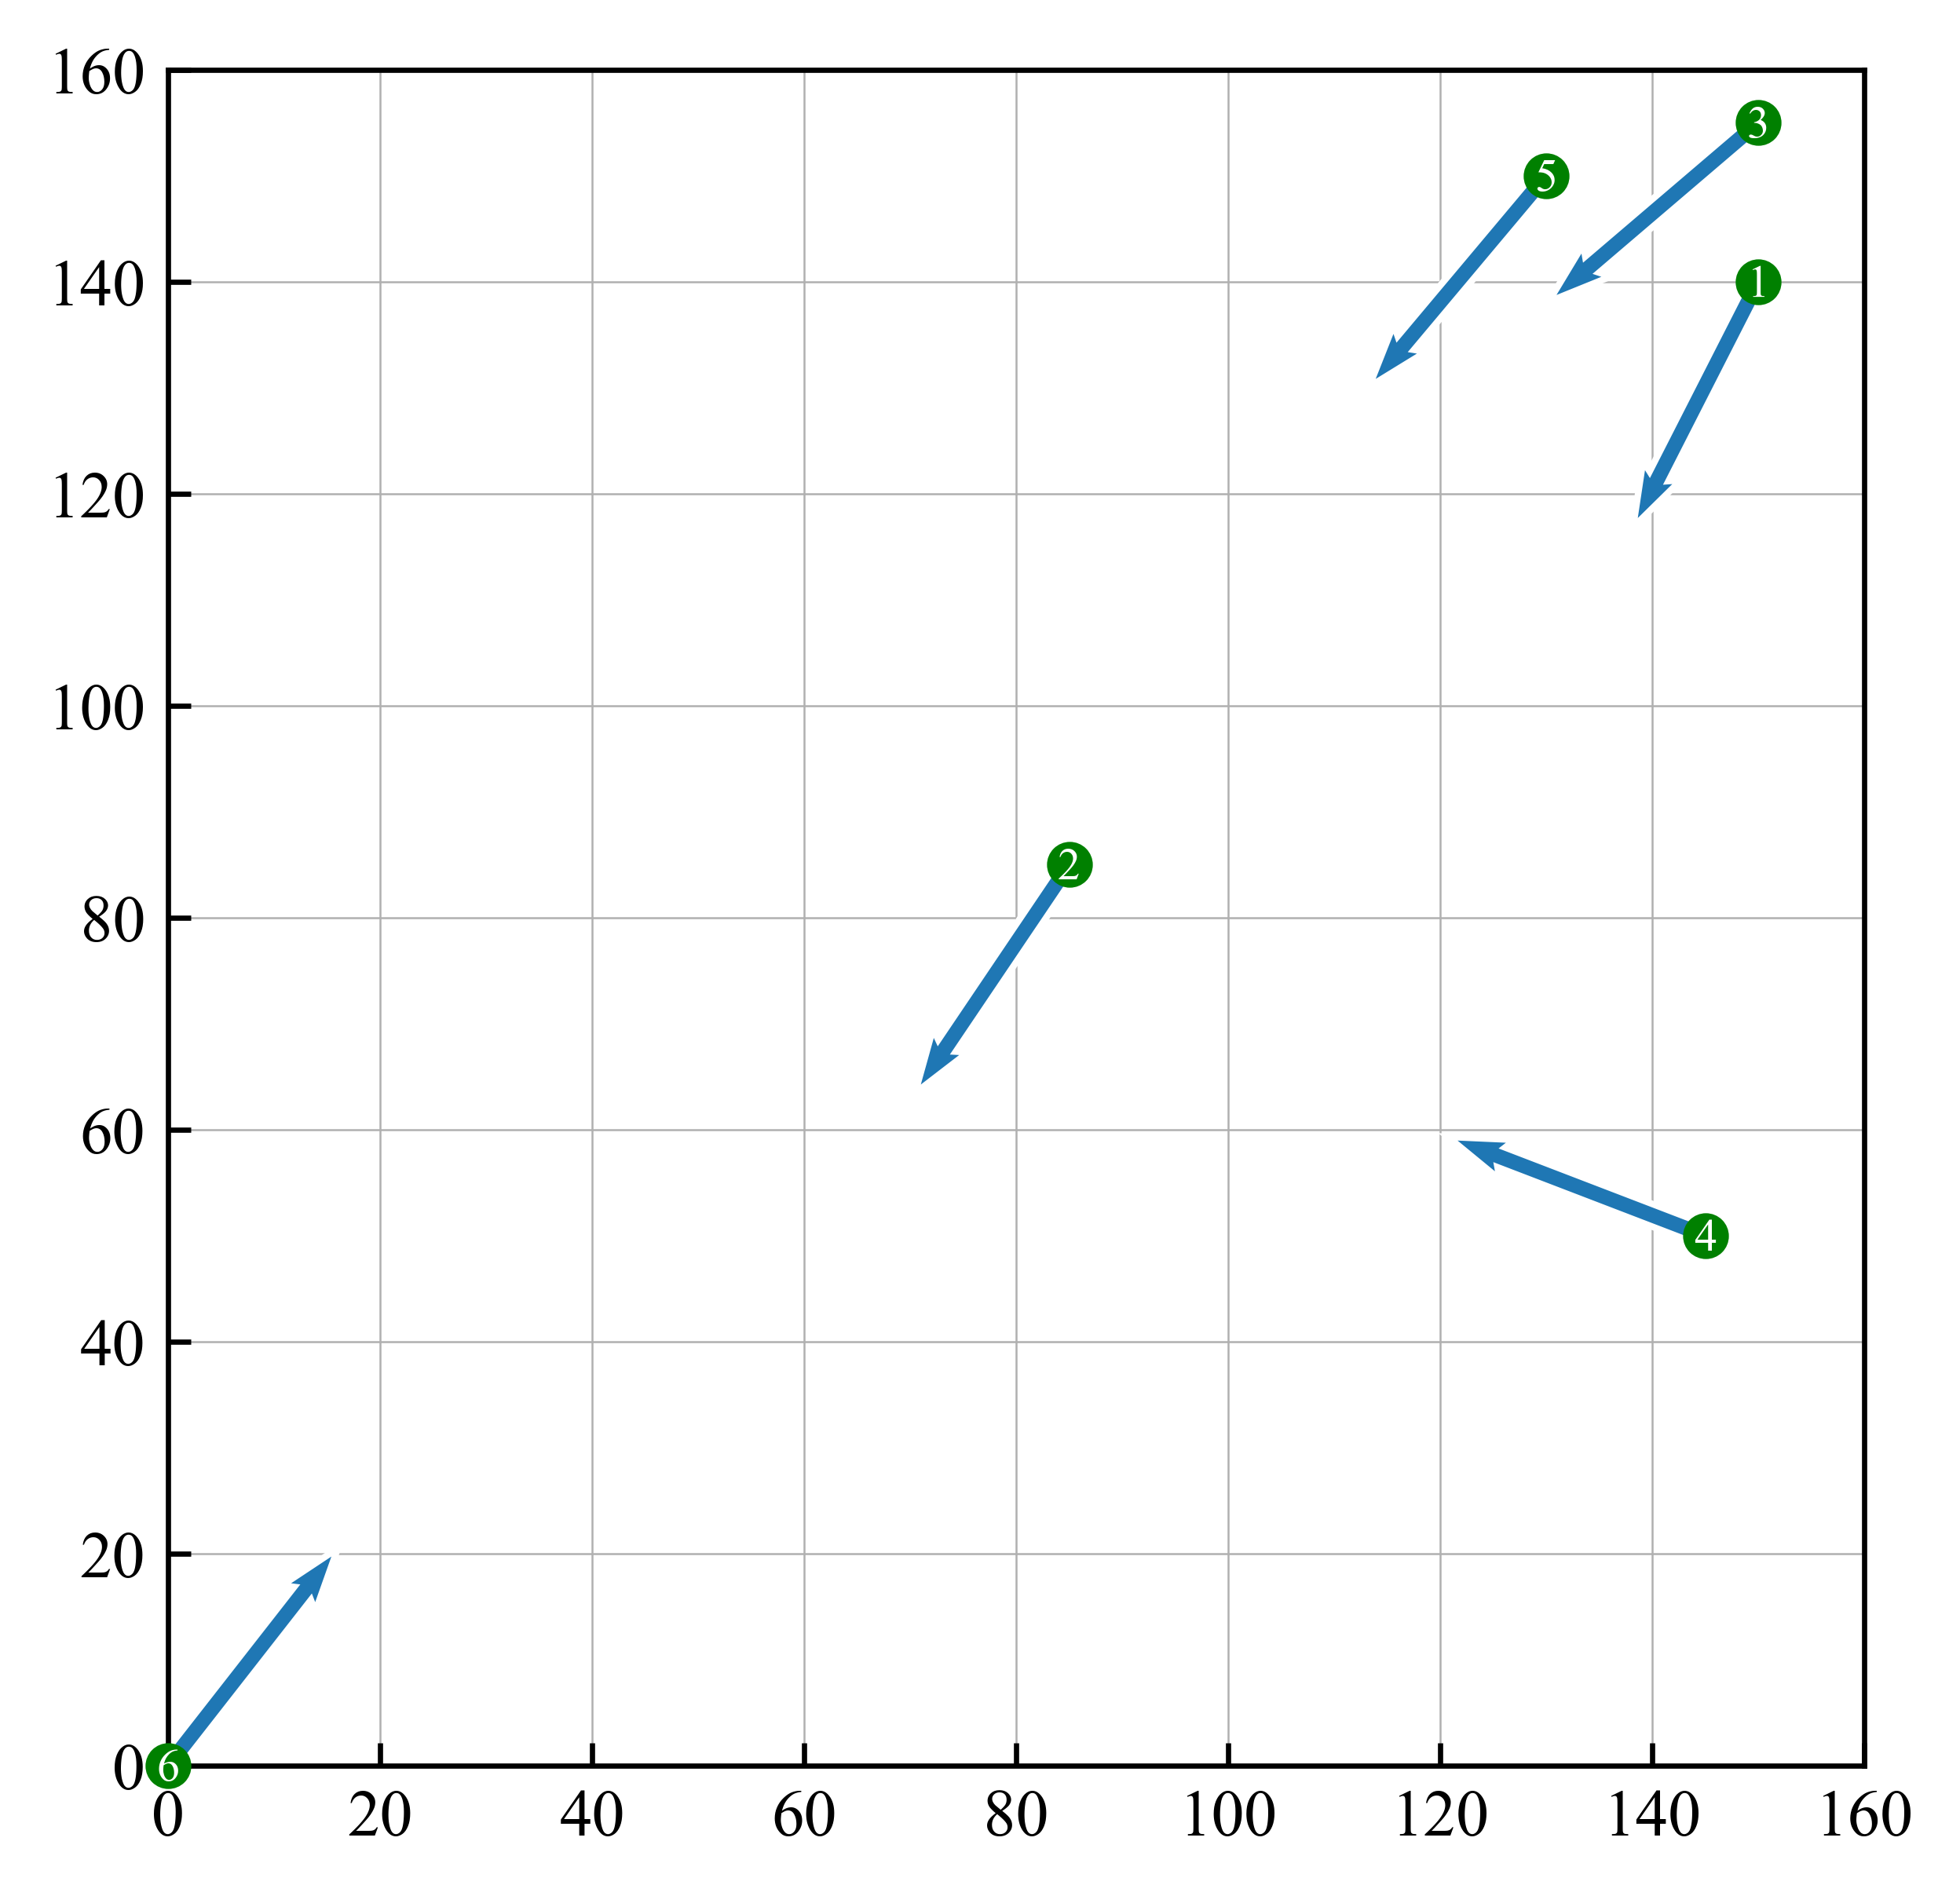

In [3]:
fig = plt.figure(dpi=600)
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.scatter(pos[:, 0], pos[:, 1], clip_on=False, zorder=5, color='green')
length = 20
for i in range(len(pos)):
    x, y, angel = pos[i, 0], pos[i, 1], pos[i, 2]
    dx = length*np.cos(angel)
    dy = length*np.sin(angel)
    ax.arrow(x, y, dx, dy, width=2, head_width=4, edgecolor='w', overhang=0.1, zorder=2)
    ax.text(x-1.1, y-1.35, f'{i+1}', fontsize=7, color='w', zorder=10)
ax.set_xbound(0, 160)
ax.set_ybound(0, 160)
ax.set_aspect(1)
ax.grid(linestyle='-', linewidth=0.3)
fig.show()

In [4]:
from sklearn.metrics import euclidean_distances
loc = pos[:, :2]
a, b = np.zeros((6, 6)), np.zeros((6,6))
r = euclidean_distances(loc, loc)
min_distance = 8
plane_num = 6

# a = np.arcsin(min_distance/r)
for i in range(plane_num):
    for j in range(plane_num):
        if i != j:
            a[i, j] = np.arcsin(min_distance/r[i, j])

# 化回到角度制
a = a*180/np.pi
np.round(a, 4)

array([[ 0.    ,  5.3912, 32.231 ,  5.0918, 20.9634,  2.2345],
       [ 5.3912,  0.    ,  4.804 ,  6.6135,  5.8079,  3.8159],
       [32.231 ,  4.804 ,  0.    ,  4.3647, 22.8337,  2.1255],
       [ 5.0918,  6.6135,  4.3647,  0.    ,  4.5377,  2.9898],
       [20.9634,  5.8079, 22.8337,  4.5377,  0.    ,  2.3098],
       [ 2.2345,  3.8159,  2.1255,  2.9898,  2.3098,  0.    ]])

In [5]:
# b = np.angle()
c_alg = loc[:, 0] + loc[:, 1]*1j # 复数的代数形式
c_exp = np.exp(1j*pos[:, 2])        # 复数的指数形式
for m in range(plane_num):
    for n in range(plane_num):
        if m != n:
            b[m, n] = np.angle((c_exp[n] - c_exp[m]) / (c_alg[m] - c_alg[n]))
            # 复数一旦形成，均被视为代数形式

# 化回到角度制
b = b*180/np.pi
np.round(b, 4)

array([[   0.    ,  109.2636, -128.25  ,   24.1798,  173.0651,   14.4749],
       [ 109.2636,    0.    ,  -88.8711,  -42.2436,  -92.3048,    9.    ],
       [-128.25  ,  -88.8711,    0.    ,   12.4763,  -58.7862,    0.3108],
       [  24.1798,  -42.2436,   12.4763,    0.    ,    5.9692,   -3.5256],
       [ 173.0651,  -92.3048,  -58.7862,    5.9692,    0.    ,    1.9144],
       [  14.4749,    9.    ,    0.3108,   -3.5256,    1.9144,    0.    ]])

In [6]:
obj = lambda x: np.sum(np.abs(x))
x0 = np.array([0,0,1,0,0,1])  # 决策变初值的选定
cons=[]
for i in range(plane_num):
        for j in range(i+1, plane_num):
            cons.append({'type': 'ineq', 'fun': lambda x, i=i, j=j: np.abs(b[i,j] + (x[i]+x[j])/2) - a[i,j]})
bd = [(-30, 30) for _ in range(plane_num)]
ret = minimize(obj, x0, constraints=cons, bounds=bd, tol=1e-10)
print(ret)
print('-'*80)
print('目标函数的最优值：', round(ret.fun, 4))
print('最优解为：', np.round(ret.x, 4))

     fun: 3.6294596142713456
     jac: array([0.73076326, 0.73076326, 1.        , 0.31768632, 0.53570145,
       1.        ])
 message: 'Optimization terminated successfully'
    nfev: 243
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([-2.00597083e-09, -2.00597066e-09,  2.56377582e+00, -5.08363334e-09,
       -3.45929531e-09,  1.06568378e+00])
--------------------------------------------------------------------------------
目标函数的最优值： 3.6295
最优解为： [-0.     -0.      2.5638 -0.     -0.      1.0657]


> *上方代码块第6行* 

Python特性：延迟绑定

每次循环都会生成一个匿名函数，但此时 `i`，`j` 并不会立即被置入函数中。此处若仅对 `x` 进行了声明 (一般情况下想当然的做法)， 在调用该函数时，`x` 与传入的 `x` 绑定，工作正常，但 `i`，`j` 由于并没有被传入，也没有被事先解释，因此解释器便会依次在 frame 中寻找 `i`，`j` 的值，此处为循环结束时的值 `plane_num` 和 `plane_num`，这也就解释了修改 `i` 的最大值，并不改变循环却影响结果的“奇怪”现象。

解决办法：在定义匿名函数时就把所有可变 (mutable) 的量设为参数固定下来，尤其是循环变量。

> ex5_10.py 中相关代码有误，导致计算结果也是错的，以此处代码和结果为准，注意避坑。